# 필요 모듈 호출

In [30]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드

In [3]:
os.listdir("data/ml-latest-small/")

['links.csv', 'tags.csv', 'ratings.csv', 'README.txt', 'movies.csv']

In [4]:
rating = pd.read_csv("data/ml-latest-small/ratings.csv", encoding="utf-8")
tag = pd.read_csv("data/ml-latest-small/tags.csv", encoding="utf-8")
movie = pd.read_csv("data/ml-latest-small/movies.csv", encoding="utf-8")

In [5]:
rating.shape

(100836, 4)

In [6]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
tag.shape

(3683, 4)

In [8]:
tag.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [9]:
movie.shape

(9742, 3)

In [10]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# EDA

In [12]:
len(rating["userId"].unique())

610

In [13]:
len(tag["tag"].unique())

1589

In [14]:
len(movie["movieId"].unique())

9742

In [16]:
rating["rating"].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [18]:
rating["rating"].value_counts().sort_index()

0.5     1370
1.0     2811
1.5     1791
2.0     7551
2.5     5550
3.0    20047
3.5    13136
4.0    26818
4.5     8551
5.0    13211
Name: rating, dtype: int64

In [24]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [28]:
rating.isnull().sum(axis=0)

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [142]:
def plot_setting(func):
    def wrapper(**kwargs):
        plt.figure(figsize=(20, 10))
        func(**kwargs)
        plt.show()
    return wrapper

In [151]:
@plot_setting
def draw_hist(data, column, kde=True):
    return sns.histplot(data=data, x=column, kde=kde)

@plot_setting
def draw_count(data, column):
    return sns.countplot(data=data, x=column)

@plot_setting
def draw_scatter(data, x, y):
    return sns.relplot(data=data, x=x, y=y)

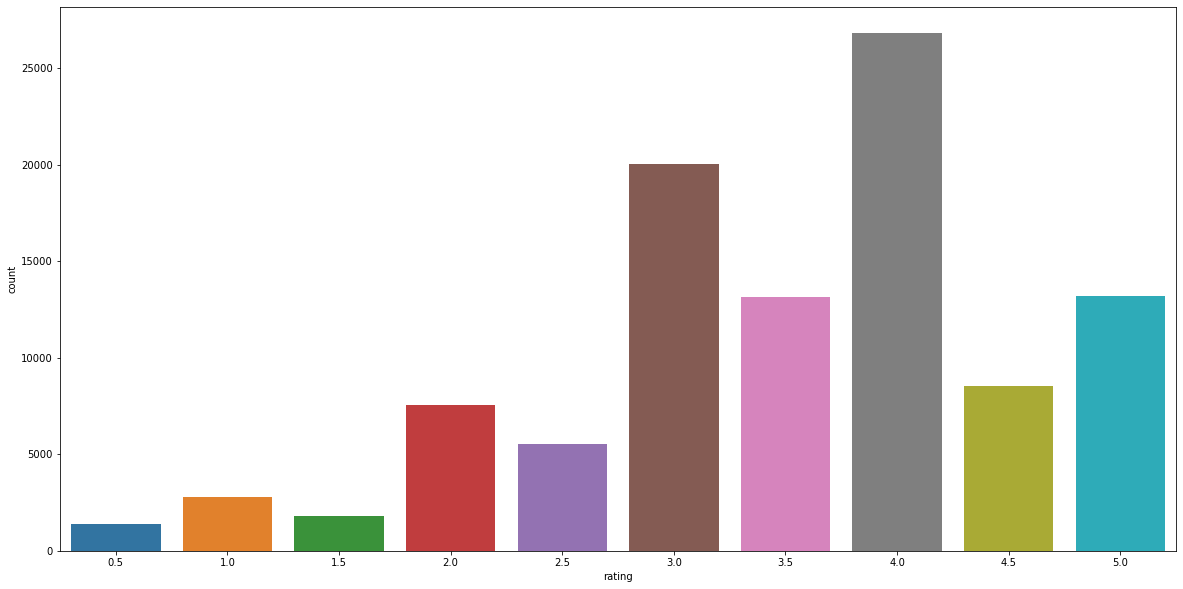

In [130]:
draw_count(data=rating, column="rating")

In [35]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [45]:
rating_by_user = rating.groupby("userId").mean()["rating"]
rating_by_user.head()

userId
1    4.366379
2    3.948276
3    2.435897
4    3.555556
5    3.636364
Name: rating, dtype: float64

In [50]:
temp = pd.DataFrame({"count":rating.groupby(["userId", "rating"]).size()}).reset_index()
temp.head()

,userId,rating,count
0,1,1.0,1
1,1,2.0,5
2,1,3.0,26
3,1,4.0,76
4,1,5.0,124


In [58]:
user_info = rating.groupby("userId")["movieId"].count()
user_info.head()

userId
1    232
2     29
3     39
4    216
5     44
Name: movieId, dtype: int64

In [62]:
user_info.describe()

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: movieId, dtype: float64

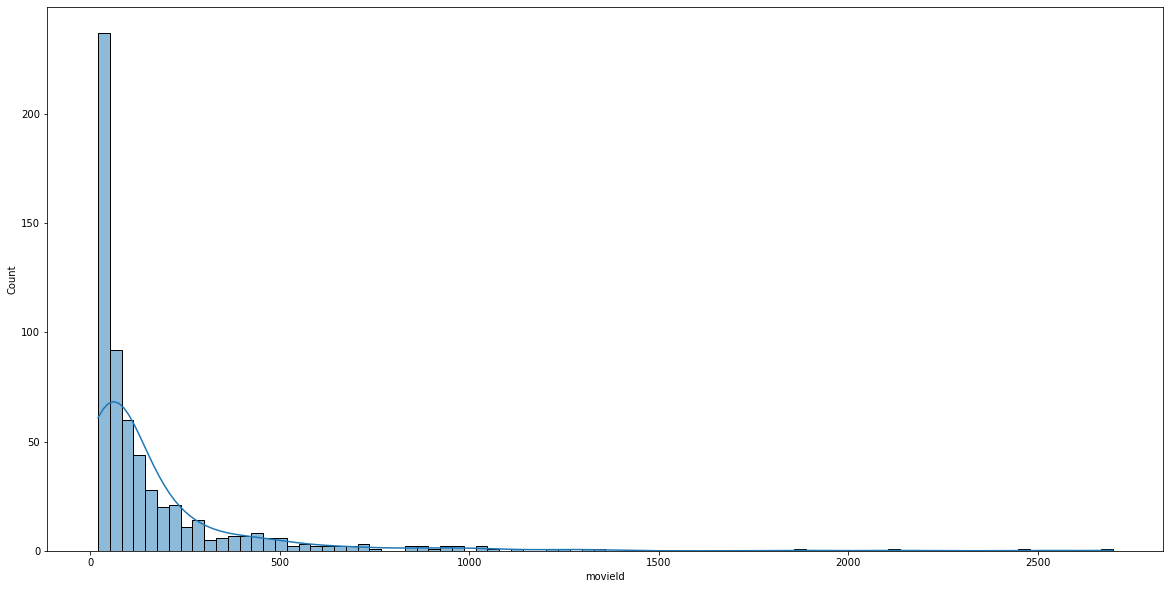

In [61]:
plt.figure(figsize=(20, 10))
sns.histplot(user_info, kde=True)
plt.show()

In [63]:
stats = pd.DataFrame({
    "movie_count":rating.groupby("userId")["movieId"].count(),
    "rating_avg":rating.groupby("userId")["rating"].mean(),
    "rating_std":rating.groupby("userId")["rating"].std()
})
stats.head()

,movie_count,rating_avg,rating_std
userId,,,
1,232,4.366379,0.800048
2,29,3.948276,0.805615
3,39,2.435897,2.090642
4,216,3.555556,1.314204
5,44,3.636364,0.990441


<Figure size 1440x720 with 0 Axes>

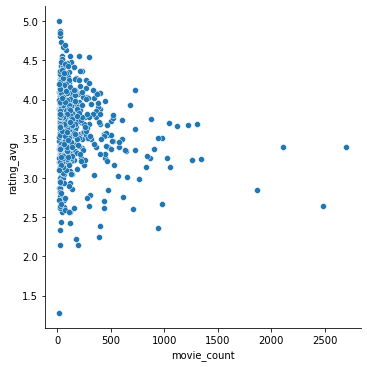

In [65]:
plt.figure(figsize=(20, 10))
sns.relplot(data=stats, x="movie_count", y="rating_avg")
plt.show()

In [66]:
movie_stats = pd.DataFrame({
    "user_count":rating.groupby("movieId")["userId"].count(),
    "rating_avg":rating.groupby("movieId")["rating"].mean(),
    "rating_std":rating.groupby("movieId")["rating"].std()
})
movie_stats.head()

,user_count,rating_avg,rating_std
movieId,,,
1,215,3.920930,0.834859
2,110,3.431818,0.881713
3,52,3.259615,1.054823
4,7,2.357143,0.852168
5,49,3.071429,0.907148


In [74]:
movie_stats.describe()

,user_count,rating_avg,rating_std
count,9724.000000,9724.000000,6278.000000
mean,10.369807,3.262448,0.839030
std,22.401005,0.869874,0.391432
min,1.000000,0.500000,0.000000
25%,1.000000,2.800000,0.629153
50%,3.000000,3.416667,0.837921
75%,9.000000,3.911765,1.051337
max,329.000000,5.000000,3.181981


<Figure size 1440x720 with 0 Axes>

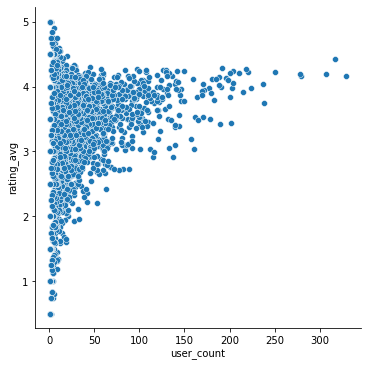

In [67]:
plt.figure(figsize=(20, 10))
sns.relplot(data=movie_stats, x="user_count", y="rating_avg", kind="scatter")
plt.show()

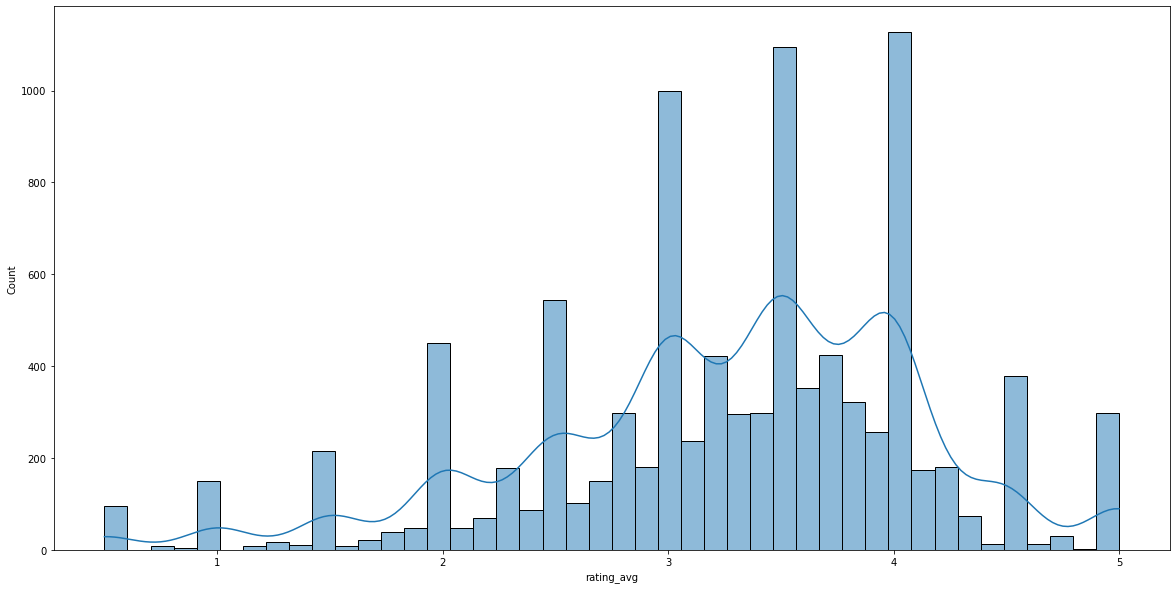

In [148]:
draw_hist(data=movie_stats, column="rating_avg", kde=True)

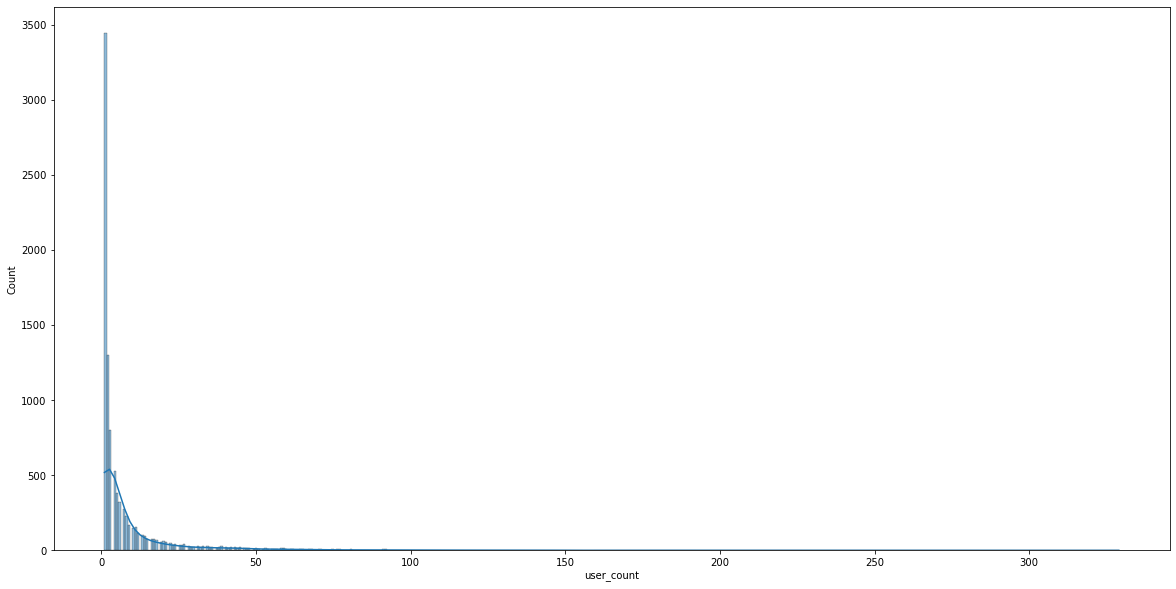

In [149]:
draw_hist(data=movie_stats, column="user_count")

In [79]:
movie_stats.shape

(9724, 3)

In [77]:
movie_stats[movie_stats["user_count"]==1].shape[0]

(3446, 3)

In [78]:
movie_stats[movie_stats["user_count"]<3].shape[0]

4744

In [97]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [98]:
temp = pd.DataFrame({"rating_count":rating.groupby("movieId")["userId"].count()}).reset_index()
temp.head()

,movieId,rating_count
0,1,215
1,2,110
2,3,52
3,4,7
4,5,49


In [99]:
movie_info = pd.merge(temp, movie, 
                      left_on="movieId",
                      right_on="movieId",
                      how="inner")
movie_info.head()

,movieId,rating_count,title,genres
0,1,215,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,110,Jumanji (1995),Adventure|Children|Fantasy
2,3,52,Grumpier Old Men (1995),Comedy|Romance
3,4,7,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,49,Father of the Bride Part II (1995),Comedy


In [100]:
movie_info.sort_values("rating_count", ascending=False)

,movieId,rating_count,title,genres
314,356,329,Forrest Gump (1994),Comedy|Drama|Romance|War
277,318,317,"Shawshank Redemption, The (1994)",Crime|Drama
257,296,307,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
510,593,279,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
1938,2571,278,"Matrix, The (1999)",Action|Sci-Fi|Thriller
...,...,...,...,...
3053,4093,1,Cop (1988),Thriller
3049,4089,1,Born in East L.A. (1987),Comedy
6687,58351,1,City of Men (Cidade dos Homens) (2007),Drama
3045,4083,1,Best Seller (1987),Thriller


In [101]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


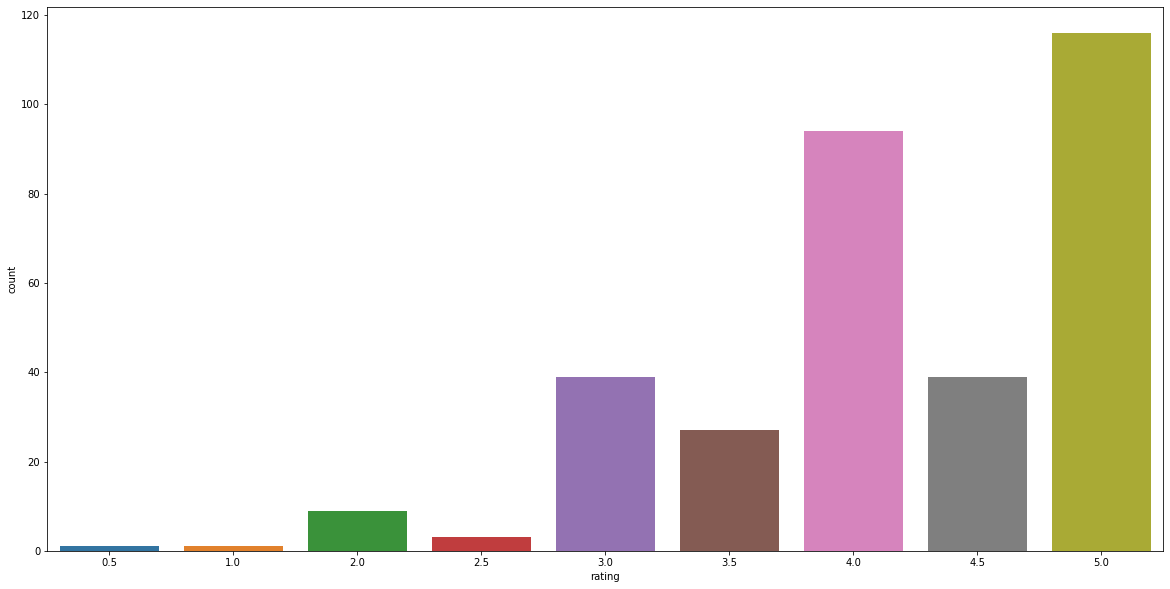

In [152]:
draw_count(data=rating[rating["movieId"]==356], column="rating")

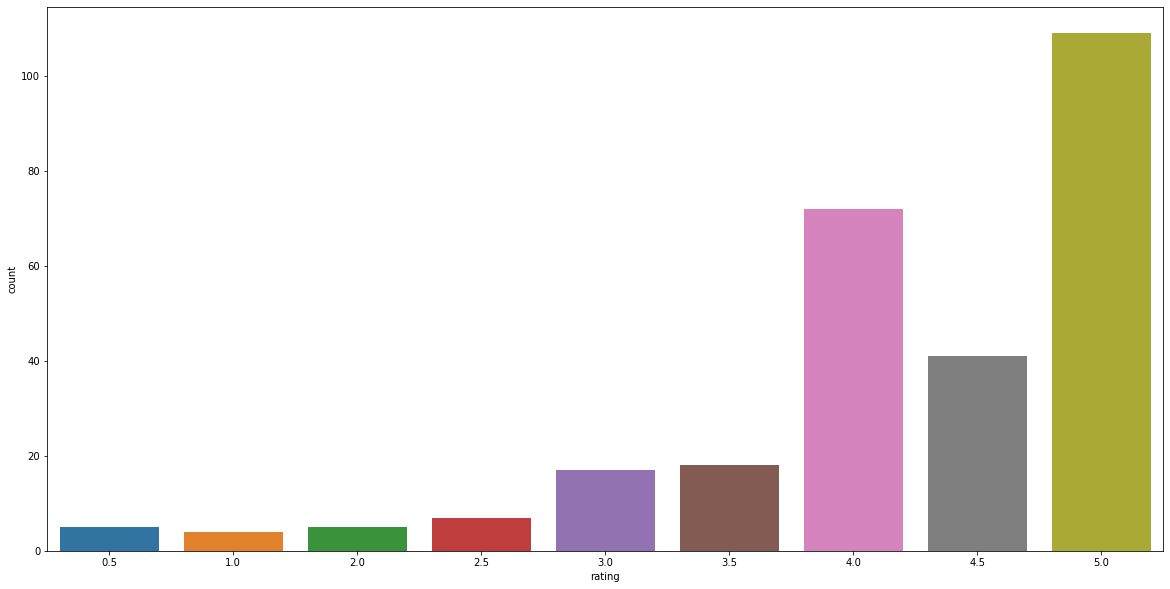

In [153]:
draw_count(data=rating[rating["movieId"]==2571], column="rating")